In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
data = pd.read_csv("netflix.csv")
data.head()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


(8790, 10)

In [ ]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract year and month from date_added
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Split 'listed_in' into genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,"[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,"[Dramas, Independent Movies, International Mov..."


/tmp/ipython-input-448797389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=data, palette="Set2")


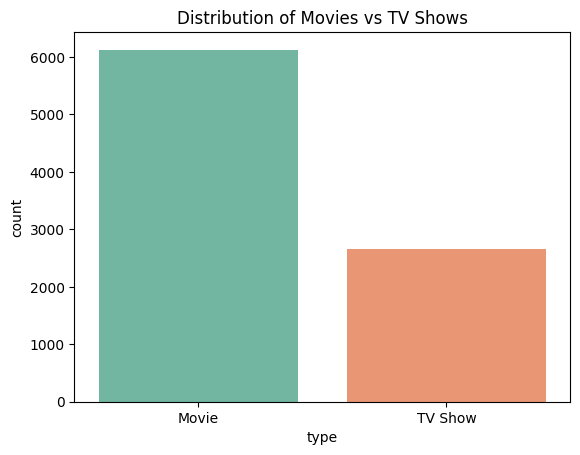

In [ ]:
sns.countplot(x="type", data=data, palette="Set2")
plt.title("Distribution of Movies vs TV Shows")
plt.show()

/tmp/ipython-input-712085450.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="rating", data=data, order=data['rating'].value_counts().index, palette="coolwarm")


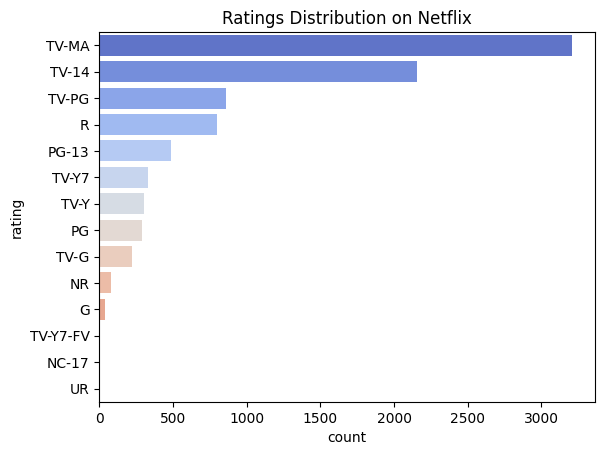

In [ ]:
sns.countplot(y="rating", data=data, order=data['rating'].value_counts().index, palette="coolwarm")
plt.title("Ratings Distribution on Netflix")
plt.show()

/tmp/ipython-input-919445451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="year_added", data=data, palette="mako")


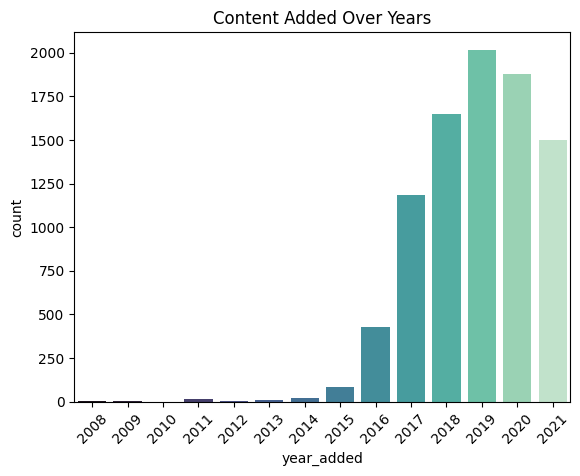

In [ ]:
sns.countplot(x="year_added", data=data, palette="mako")
plt.title("Content Added Over Years")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3115733040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


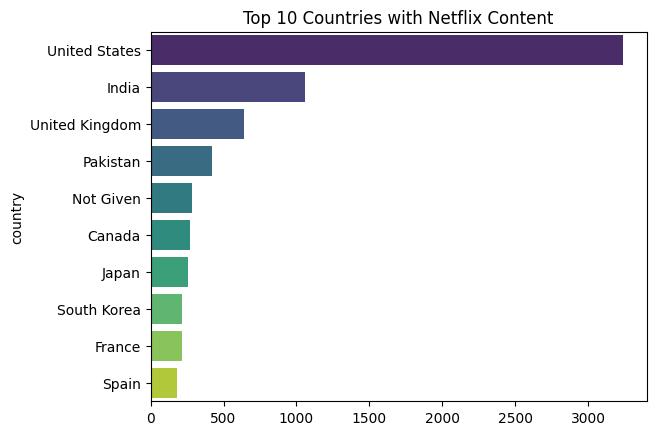

In [ ]:
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Netflix Content")
plt.show()

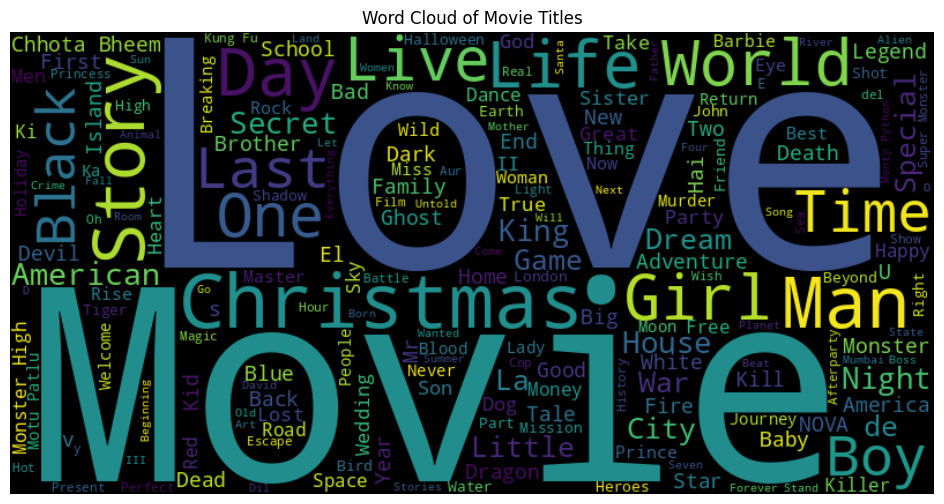

In [ ]:
movie_titles = data[data['type']=="Movie"]['title']
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(movie_titles))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Titles")
plt.show()

/tmp/ipython-input-399605150.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




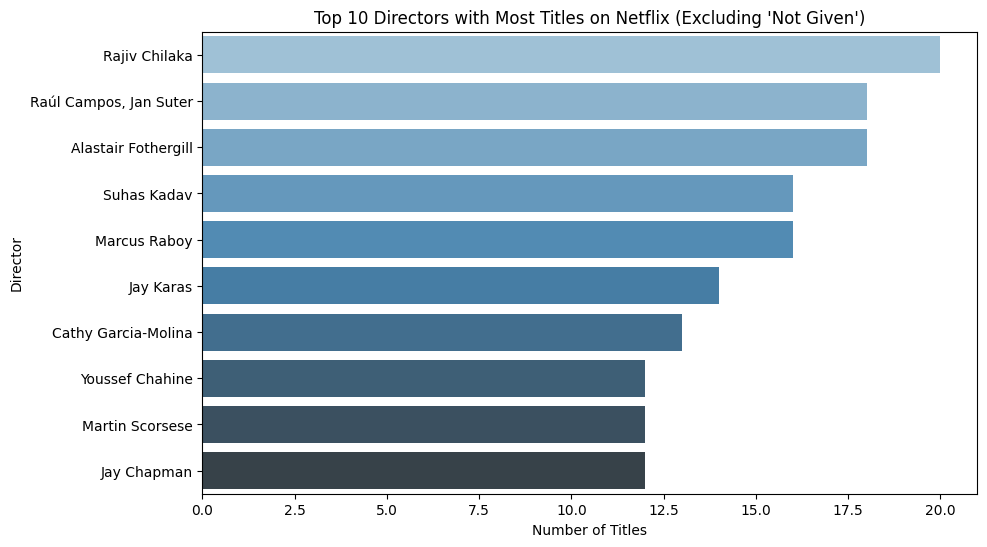

In [ ]:
# Remove directors with 'Not Given' or missing values
directors = data[data['director'].notna()]
directors = directors[directors['director'].str.lower() != "not given"]

# Top 10 directors
top_directors = directors['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="Blues_d")
plt.title("Top 10 Directors with Most Titles on Netflix (Excluding 'Not Given')")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

/tmp/ipython-input-3637906292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Set3")


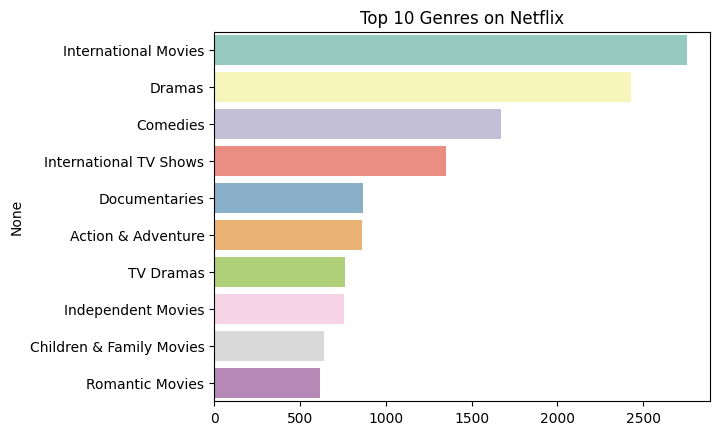

In [ ]:
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Set3")
plt.title("Top 10 Genres on Netflix")
plt.show()

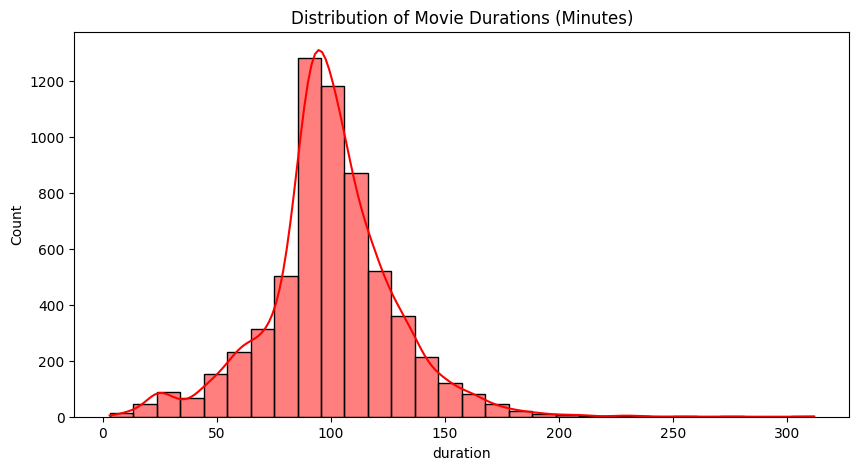

In [ ]:
# Separate movies and TV shows duration
movies = data[data['type']=="Movie"].copy()
movies['duration'] = movies['duration'].str.replace(" min","").astype(float)

tv_shows = data[data['type']=="TV Show"].copy()
tv_shows['duration'] = tv_shows['duration'].str.replace(" Season","").str.replace("s","").astype(int)

plt.figure(figsize=(10,5))
sns.histplot(movies['duration'], bins=30, color="red", kde=True)
plt.title("Distribution of Movie Durations (Minutes)")
plt.show()

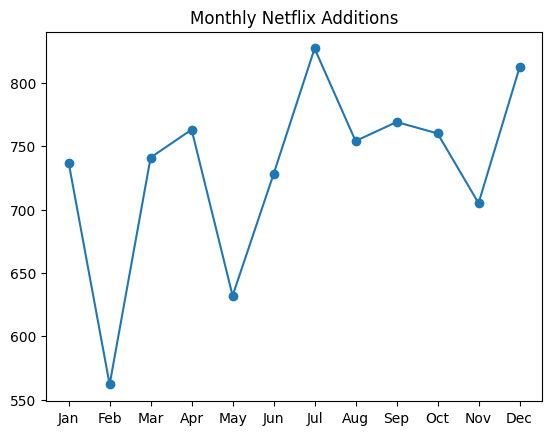

In [ ]:
monthly_releases = data['month_added'].value_counts().sort_index()
plt.plot(monthly_releases.index, monthly_releases.values, marker='o')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Monthly Netflix Additions")
plt.show()

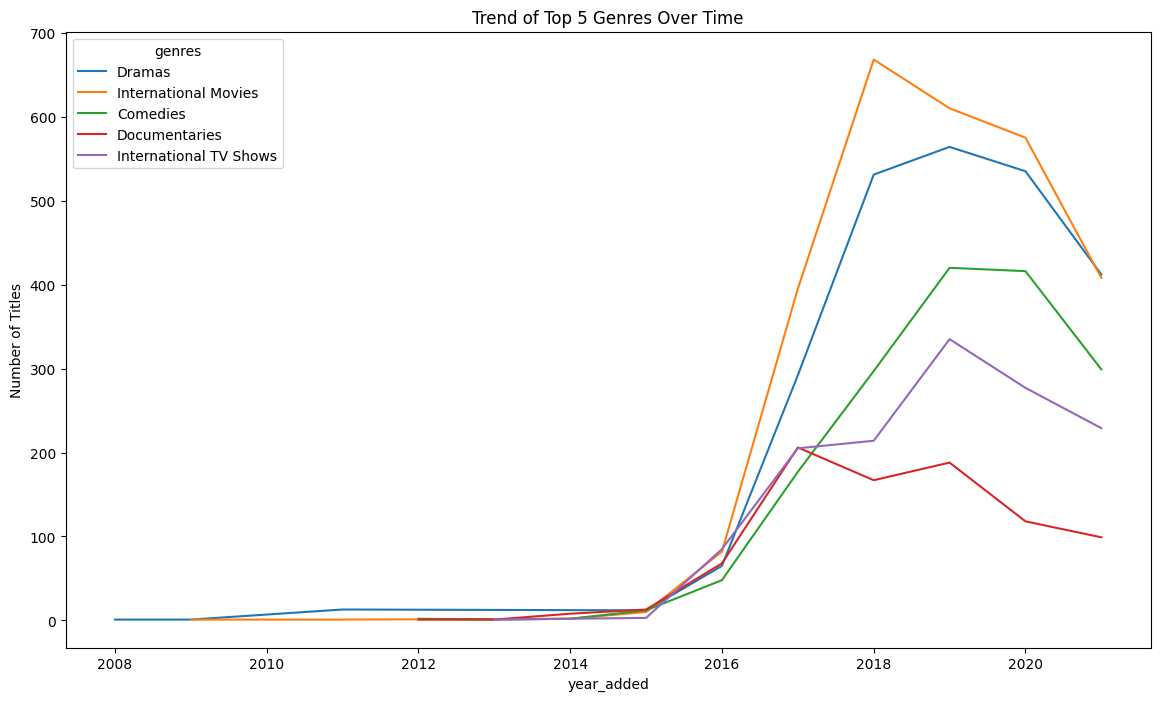

In [ ]:
# Expand 'listed_in' (genres) and link with year_added
genre_trend = data.explode('genres').groupby(['year_added','genres']).size().reset_index(name='count')

plt.figure(figsize=(14,8))
top_genres = genre_trend.groupby('genres')['count'].sum().sort_values(ascending=False).head(5).index
sns.lineplot(x='year_added', y='count', hue='genres', data=genre_trend[genre_trend['genres'].isin(top_genres)])
plt.title("Trend of Top 5 Genres Over Time")
plt.ylabel("Number of Titles")
plt.show()

In [ ]:
fig = px.scatter(country_clusters, x="Movie", y="TV Show",
                 color="cluster", text="country",
                 size_max=40, template="plotly_white",
                 title="Clustering Countries by Content Type (Interactive)")

fig.update_traces(textposition='top center')
fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphnuvh1ut/r__v2bj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphnuvh1ut/ks707btq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56494', 'data', 'file=/tmp/tmphnuvh1ut/r__v2bj0.json', 'init=/tmp/tmphnuvh1ut/ks707btq.json', 'output', 'file=/tmp/tmphnuvh1ut/prophet_modeloe7d84kt/prophet_model-20250830065423.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:54:23 - cmdstanpy - INFO - Chain [1] start processing
IN

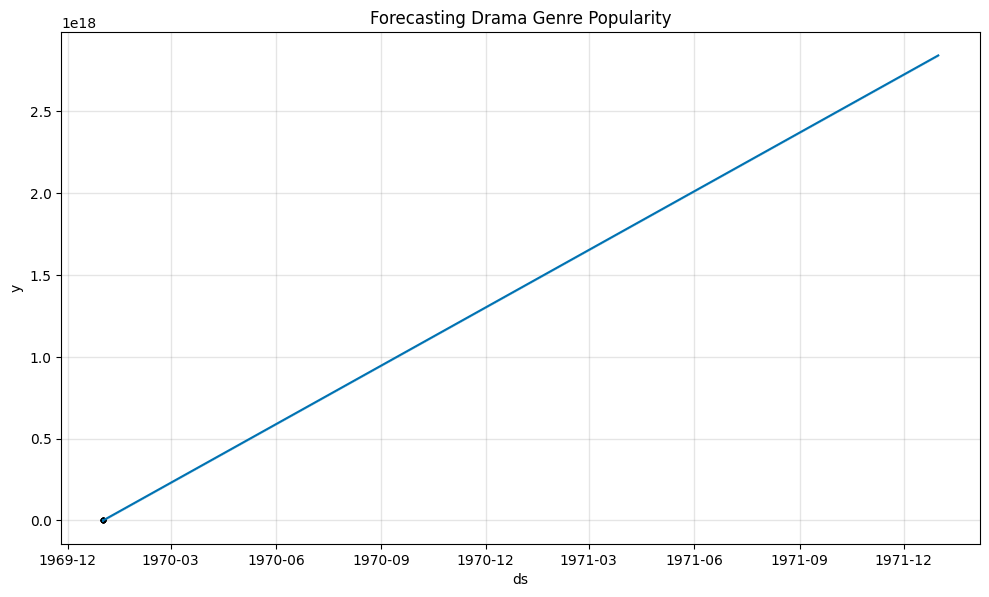

In [ ]:
from prophet import Prophet

# Focus on one genre (e.g., Drama)
drama_trend = genre_trend[genre_trend['genres']=="Dramas"][['year_added','count']]
drama_trend = drama_trend.groupby('year_added').sum().reset_index()
drama_trend.columns = ['ds','y']   # Prophet expects these names

# Train model
model = Prophet()
model.fit(drama_trend)

# Make future predictions
future = model.make_future_dataframe(periods=2, freq='Y')  # forecast 2 years ahead
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Forecasting Drama Genre Popularity")
plt.show()

In [ ]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,"[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,"[Dramas, Independent Movies, International Mov..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,"[International TV Shows, TV Dramas]"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,[Kids' TV]
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,"[International TV Shows, Romantic TV Shows, TV..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,[Kids' TV]
